Import Statements

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

Loading Dataset and setting style + Removing rows with missing values

In [23]:
df = pd.read_excel('advertising_sales_data.xlsx')
plt.style.use('seaborn-v0_8')
plt.rcParams['font.family'] = 'Liberation Serif'
df = df.dropna()

Descritptive Statistics

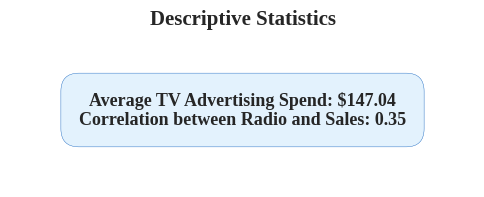

In [12]:
avg_tv = df['TV'].mean()
corr_radio_sales = df['Radio'].corr(df['Sales'])

desc_text = (
    f"Average TV Advertising Spend: ${avg_tv:.2f}\n"
    f"Correlation between Radio and Sales: {corr_radio_sales:.2f}"
)
fig, ax = plt.subplots(figsize=(6, 2))
ax.axis('off')
ax.text(
    0.5, 0.5, desc_text,
    fontsize=13, fontweight='bold',
    va='center', ha='center',
    bbox=dict(boxstyle='round,pad=1', facecolor='#e3f2fd', edgecolor='#1565c0')
)
plt.title('Descriptive Statistics', fontsize=15, fontweight='bold')
plt.show()

Pairplot

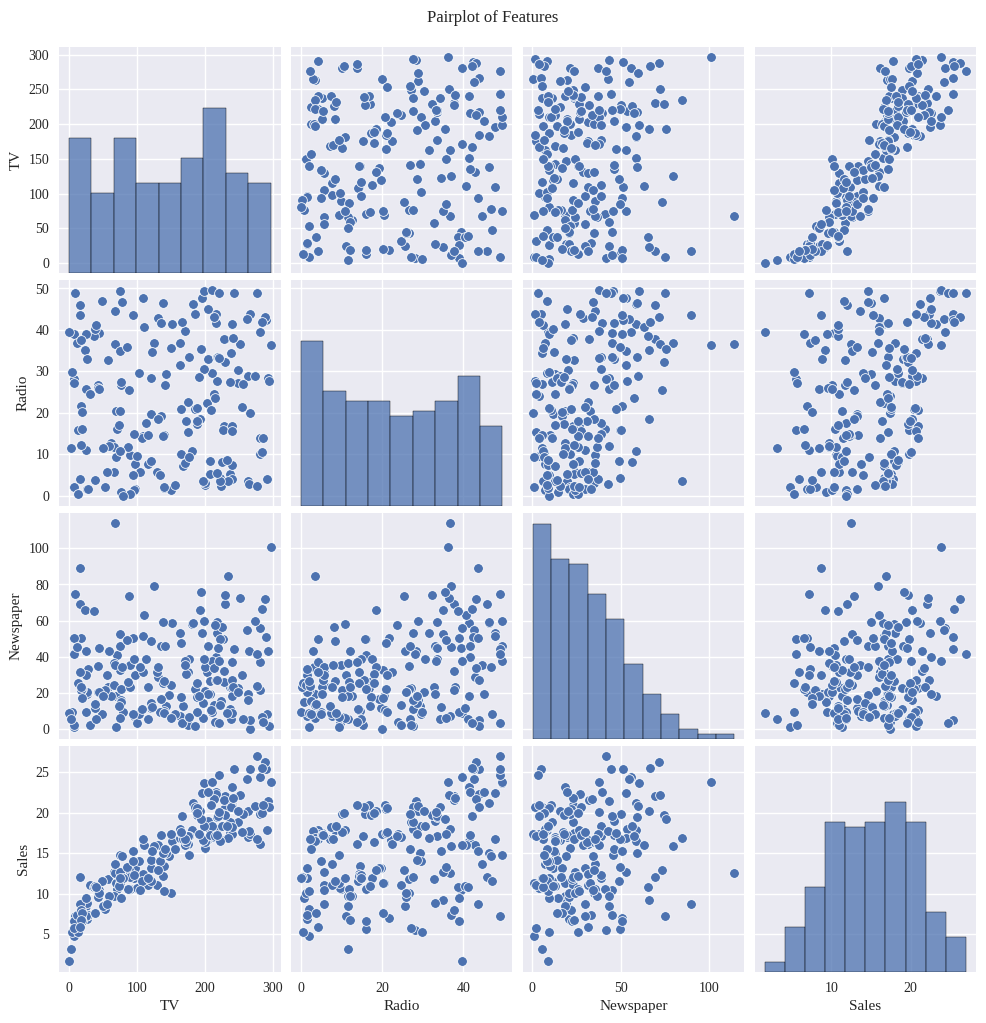

In [16]:
sns.pairplot(df)
plt.suptitle("Pairplot of Features", y=1.02)
plt.show()

Correlation Heatmap

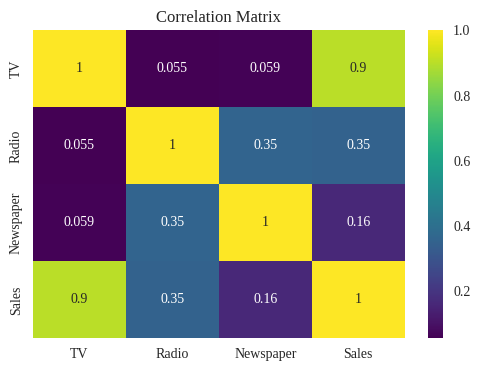

In [25]:
plt.figure(figsize=(6,4))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='viridis')
plt.title("Correlation Matrix")
plt.show()

Regression with All Features

In [24]:
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

Regression Coefficients

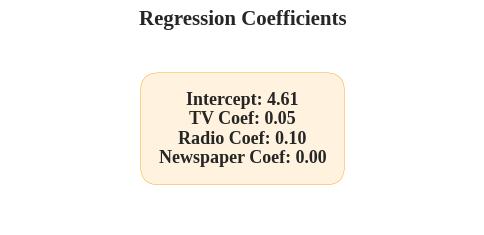

In [26]:
coef_text = (
    f"Intercept: {model.intercept_:.2f}\n"
    f"TV Coef: {model.coef_[0]:.2f}\n"
    f"Radio Coef: {model.coef_[1]:.2f}\n"
    f"Newspaper Coef: {model.coef_[2]:.2f}"
)
fig, ax = plt.subplots(figsize=(6, 2.5))
ax.axis('off')
ax.text(
    0.5, 0.5, coef_text,
    fontsize=13, fontweight='bold',
    va='center', ha='center',
    bbox=dict(boxstyle='round,pad=1', facecolor='#fff3e0', edgecolor='#ff9800')
)
plt.title('Regression Coefficients', fontsize=15, fontweight='bold')
plt.show()

Model Performance

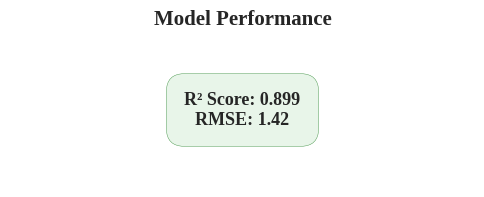

In [29]:
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
perf_text = (
    f"R² Score: {r2:.3f}\n"
    f"RMSE: {rmse:.2f}"
)
fig, ax = plt.subplots(figsize=(6, 2))
ax.axis('off')
ax.text(
    0.5, 0.5, perf_text,
    fontsize=13, fontweight='bold',
    va='center', ha='center',
    bbox=dict(boxstyle='round,pad=1', facecolor='#e8f5e9', edgecolor='#388e3c')
)
plt.title('Model Performance', fontsize=15, fontweight='bold')
plt.show()

Plot predictions vs Actual

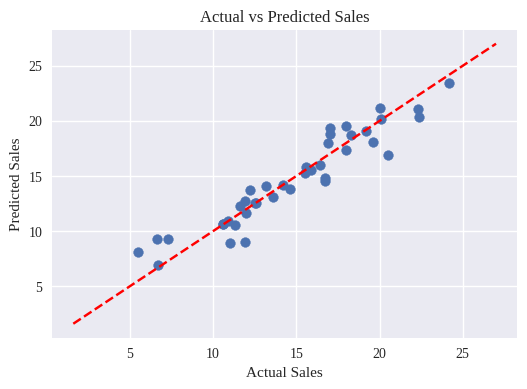

In [30]:
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.grid(True)
plt.show()

Predict for new input

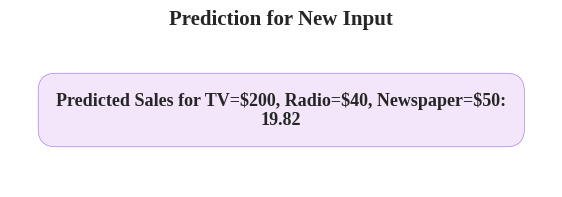

In [46]:
new_input = pd.DataFrame({'TV': [200], 'Radio': [40], 'Newspaper': [50]})
new_prediction = model.predict(new_input)[0]
pred_text = f"Predicted Sales for TV=$200, Radio=$40, Newspaper=$50:\n{new_prediction:.2f}"
fig, ax = plt.subplots(figsize=(7, 2))
ax.axis('off')
ax.text(
    0.5, 0.5, pred_text,
    fontsize=13, fontweight='bold',
    va='center', ha='center',
    bbox=dict(boxstyle='round,pad=1', facecolor='#f3e6fa', edgecolor='#7c3aed')
)
plt.title('Prediction for New Input', fontsize=15, fontweight='bold')
plt.show()

Normalize Data and Retrain

In [36]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model_n = LinearRegression()
model_n.fit(X_train_n, y_train_n)
y_pred_n = model_n.predict(X_test_n)

Normalized Model Performance

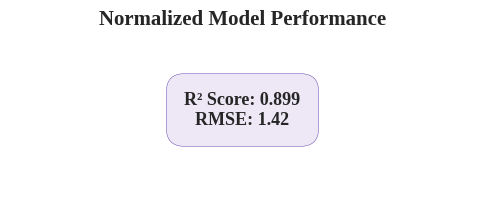

In [42]:
r2_n = r2_score(y_test_n, y_pred_n)
rmse_n = np.sqrt(mean_squared_error(y_test_n, y_pred_n))
norm_perf_text = (f"R² Score: {r2_n:.3f}\n"
    f"RMSE: {rmse_n:.2f}"
)
fig,ax = plt.subplots(figsize=(6, 2))
ax.axis('off')
ax.text(
    0.5, 0.5, norm_perf_text,
    fontsize=13, fontweight='bold',
    va='center', ha='center',
    bbox=dict(boxstyle='round,pad=1', facecolor='#ede7f6', edgecolor='#512da8')
)
plt.title('Normalized Model Performance', fontsize=15, fontweight='bold')
plt.show()

Regression with only Radio and Newspaper

In [47]:
X_partial = df[['Radio', 'Newspaper']]
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X_partial, y, test_size=0.2, random_state=42)

model_p = LinearRegression()
model_p.fit(X_train_p, y_train_p)
y_pred_p = model_p.predict(X_test_p)

Model Using Only Radio & Newspaper

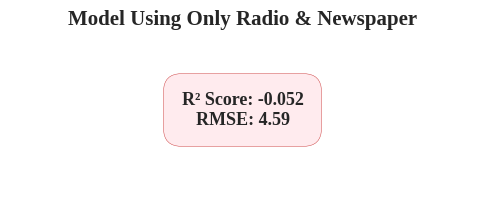

In [50]:
r2_p = r2_score(y_test_p, y_pred_p)
rmse_p = np.sqrt(mean_squared_error(y_test_p, y_pred_p))
partial_perf_text = (
    f"R² Score: {r2_p:.3f}\n"
    f"RMSE: {rmse_p:.2f}"
)
fig, ax = plt.subplots(figsize=(6, 2))
ax.axis('off')
ax.text(
    0.5, 0.5, partial_perf_text,
    fontsize=13, fontweight='bold',
    va='center', ha='center',
    bbox=dict(boxstyle='round,pad=1', facecolor='#ffebee', edgecolor='#c62828')
)
plt.title('Model Using Only Radio & Newspaper', fontsize=15, fontweight='bold')
plt.show()